# MLP
Cell line 10 SK.N.DZ

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was a learn fail during CV.

MCC mean 0.1219

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 15:53:17.017317


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=10]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14]


2023-04-29 15:53:19.008415
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 677
Num RCI: 677
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 677 sequences.

Training # 1 1
2023-04-29 15:53:23.309971
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-2.224713842072994, 0.020232830956415024]
Variances [2.6197582  1.11393983]
Priors [0.296359 0.703641]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 432:118 78.55%
Computed class weights: {0: 2.330508474576271, 1: 0.6365740740740741}
Valid 1:0 109:18 85.83%
FIT


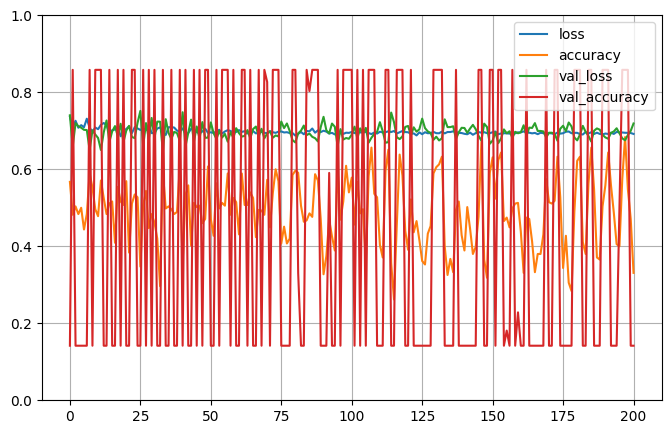


Testing # 1 1
2023-04-29 15:53:50.838130
PREDICT
Test 1:0 109:18 85.83%
Predict 1:0 127:0 100.00%
Test sizes (127, 1025) (127,)
Distrib of scores: 0.50225705 mean 0.0001752475 std
Range of scores: 0.50180906 to 0.502665
Score threshold 0.5
Confusion matrix
 [[  0  18]
 [  0 109]]
Normalized matrix
 [[0.         0.14173228]
 [0.         0.85826772]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


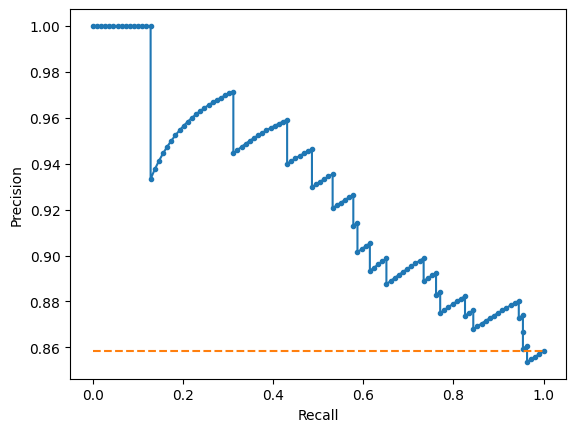

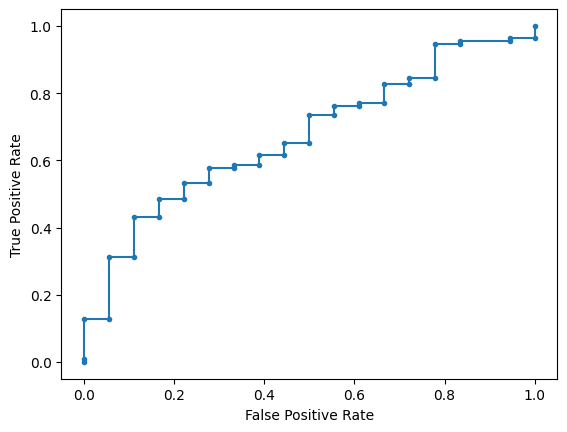

Accuracy: 85.83% Precision: 85.83% Recall: 100.00%
F1: 92.37% MCC: 0.0000
AUPRC: 92.73% AUROC: 67.07%
 accuracy [85.8267716535433]
 precision [85.8267716535433]
 recall [100.0]
 F1 [92.37288135593221]
 MCC [0.0]
 AUPRC [92.73354766260789]
 AUROC [67.07441386340469]

Training # 1 2
2023-04-29 15:53:51.452926
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [-2.1012140788567963, -0.005030614451753794]
Variances [2.79733    1.06871412]
Priors [0.30068823 0.69931177]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 426:111 79.33%
Computed class weights: {0: 2.418918918918919, 1: 0.6302816901408451}
Valid 1:0 114:26 81.43%
FIT


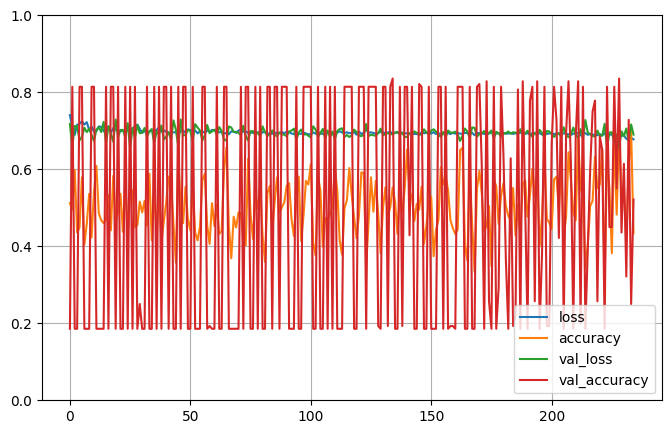


Testing # 1 2
2023-04-29 15:54:34.451569
PREDICT
Test 1:0 114:26 81.43%
Predict 1:0 137:3 97.86%
Test sizes (140, 1025) (140,)
Distrib of scores: 0.5009288 mean 0.00042854436 std
Range of scores: 0.49983022 to 0.50202185
Score threshold 0.5
Confusion matrix
 [[  3  23]
 [  0 114]]
Normalized matrix
 [[0.02142857 0.16428571]
 [0.         0.81428571]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


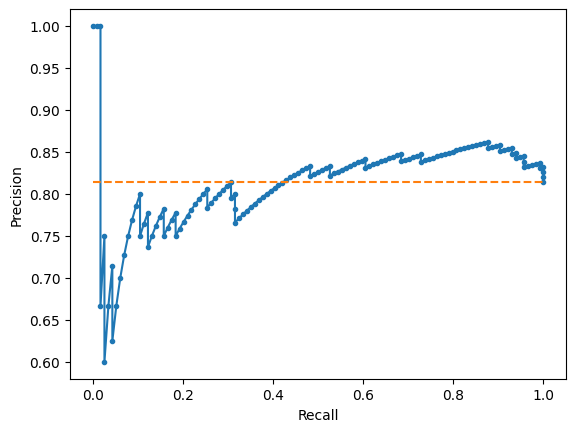

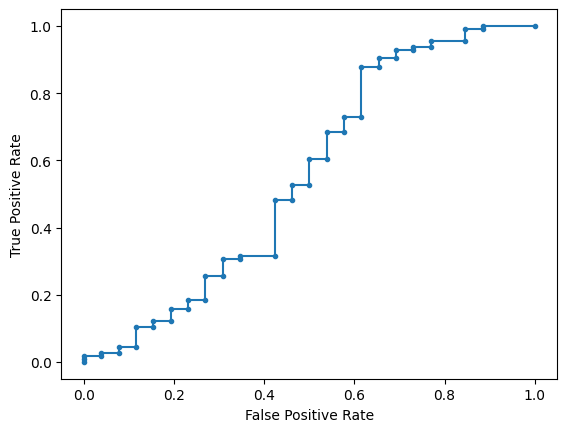

Accuracy: 83.57% Precision: 83.21% Recall: 100.00%
F1: 90.84% MCC: 0.3099
AUPRC: 81.41% AUROC: 55.50%
 accuracy [83.57142857142857]
 precision [83.21167883211679]
 recall [100.0]
 F1 [90.83665338645417]
 MCC [0.30986041305000445]
 AUPRC [81.4103203241771]
 AUROC [55.49932523616735]

Training # 1 3
2023-04-29 15:54:35.064242
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [0.07526895825595922, -2.02644328570694]
Variances [1.09271271 2.53043353]
Priors [0.70738676 0.29261324]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 426:109 79.63%
Computed class weights: {0: 2.4541284403669725, 1: 0.6279342723004695}
Valid 1:0 105:37 73.94%
FIT


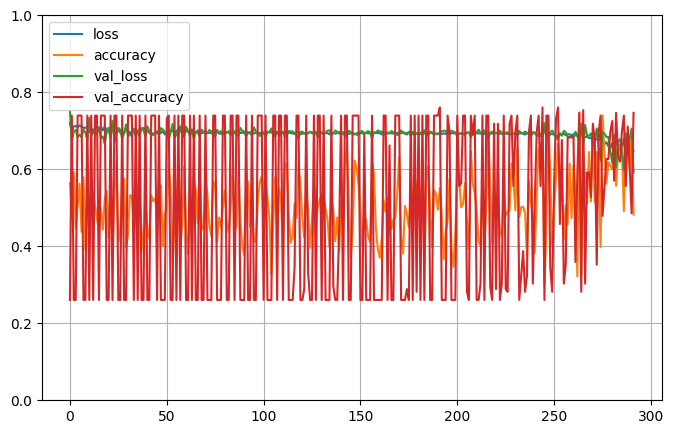


Testing # 1 3
2023-04-29 15:55:16.409217
PREDICT
Test 1:0 105:37 73.94%
Predict 1:0 139:3 97.89%
Test sizes (142, 1025) (142,)
Distrib of scores: 0.50143164 mean 0.00057543116 std
Range of scores: 0.4998793 to 0.50293905
Score threshold 0.5
Confusion matrix
 [[  3  34]
 [  0 105]]
Normalized matrix
 [[0.02112676 0.23943662]
 [0.         0.73943662]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


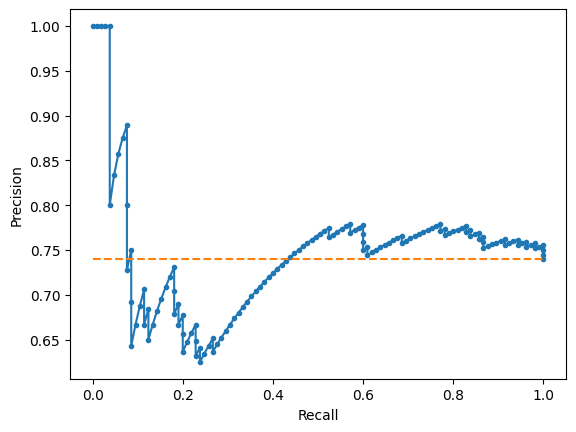

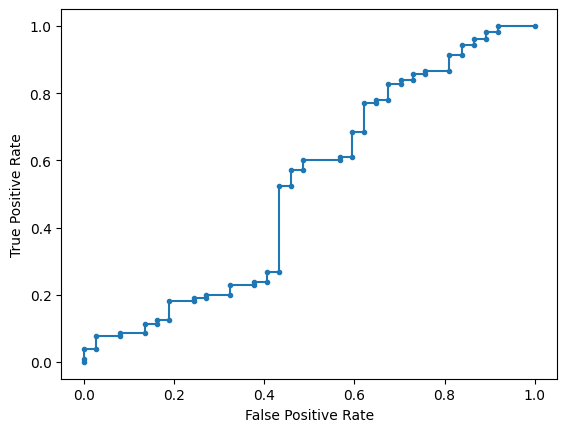

Accuracy: 76.06% Precision: 75.54% Recall: 100.00%
F1: 86.07% MCC: 0.2475
AUPRC: 74.68% AUROC: 52.20%
 accuracy [76.05633802816901]
 precision [75.53956834532374]
 recall [100.0]
 F1 [86.0655737704918]
 MCC [0.24748393616227016]
 AUPRC [74.6753666981777]
 AUROC [52.20077220077219]

Training # 1 4
2023-04-29 15:55:16.986222
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [0.02568464726154422, -2.119392608918039]
Variances [1.10799983 2.66102032]
Priors [0.71756512 0.28243488]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 442:104 80.95%
Computed class weights: {0: 2.625, 1: 0.6176470588235294}
Valid 1:0 102:29 77.86%
FIT


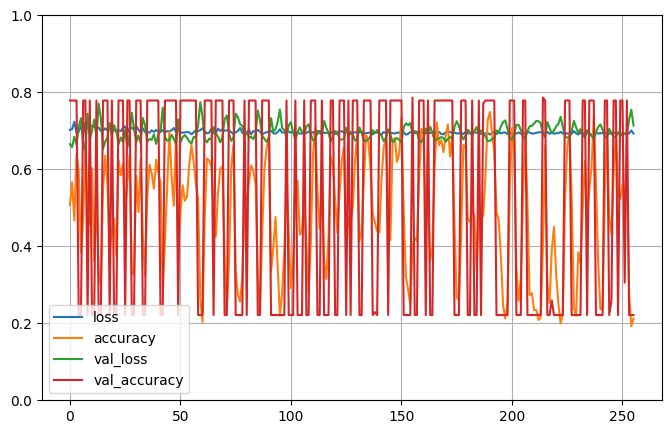


Testing # 1 4
2023-04-29 15:55:52.368833
PREDICT
Test 1:0 102:29 77.86%
Predict 1:0 128:3 97.71%
Test sizes (131, 1025) (131,)
Distrib of scores: 0.50043553 mean 0.00019595416 std
Range of scores: 0.49987346 to 0.50090855
Score threshold 0.5
Confusion matrix
 [[  2  27]
 [  1 101]]
Normalized matrix
 [[0.01526718 0.20610687]
 [0.00763359 0.77099237]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


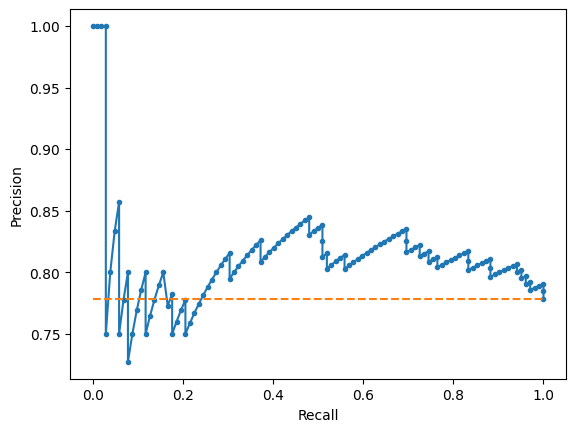

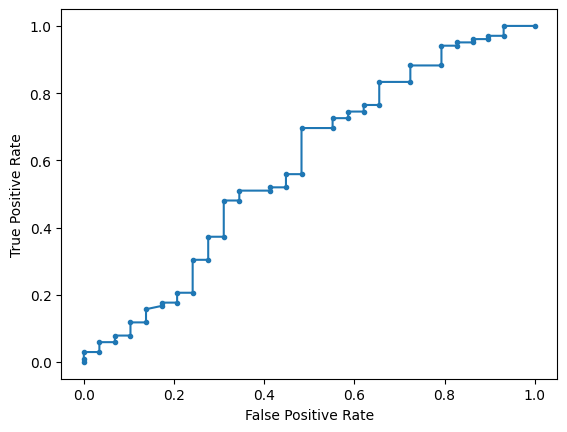

Accuracy: 78.63% Precision: 78.91% Recall: 99.02%
F1: 87.83% MCC: 0.1642
AUPRC: 81.06% AUROC: 58.50%
 accuracy [78.62595419847328]
 precision [78.90625]
 recall [99.01960784313727]
 F1 [87.82608695652175]
 MCC [0.16420007519673516]
 AUPRC [81.06267628418266]
 AUROC [58.5023664638269]

Training # 1 5
2023-04-29 15:55:52.973306
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [-1.8839654385464761, 0.016679186161073528]
Variances [2.28572106 1.13235963]
Priors [0.33591417 0.66408583]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 417:123 77.22%
Computed class weights: {0: 2.1951219512195124, 1: 0.6474820143884892}
Valid 1:0 105:32 76.64%
FIT


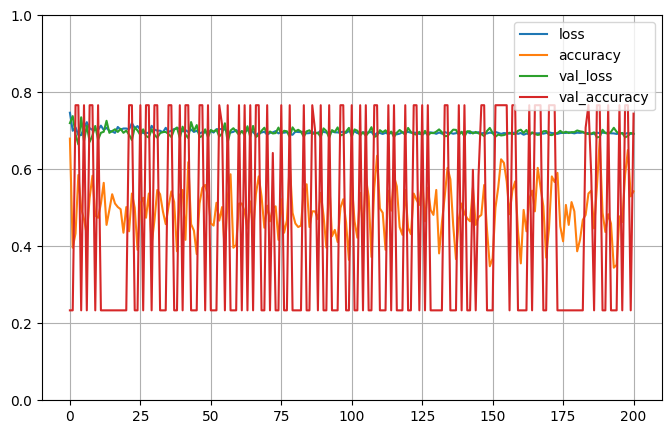


Testing # 1 5
2023-04-29 15:56:35.984138
PREDICT
Test 1:0 105:32 76.64%
Predict 1:0 137:0 100.00%
Test sizes (137, 1025) (137,)
Distrib of scores: 0.50821686 mean 0.00022224447 std
Range of scores: 0.50764084 to 0.5087551
Score threshold 0.5
Confusion matrix
 [[  0  32]
 [  0 105]]
Normalized matrix
 [[0.         0.23357664]
 [0.         0.76642336]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


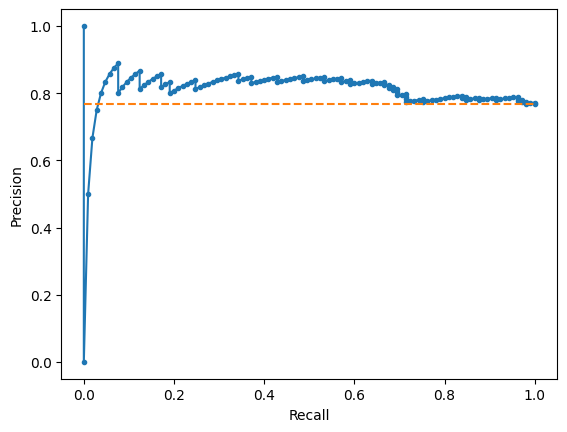

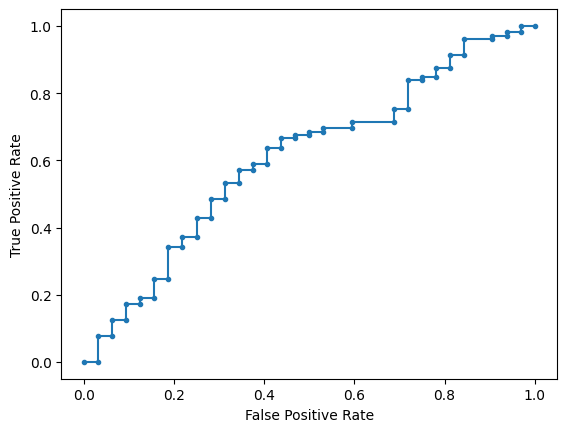

Accuracy: 76.64% Precision: 76.64% Recall: 100.00%
F1: 86.78% MCC: 0.0000
AUPRC: 81.00% AUROC: 60.74%
 accuracy [76.64233576642336]
 precision [76.64233576642336]
 recall [100.0]
 F1 [86.77685950413223]
 MCC [0.0]
 AUPRC [81.00419956929608]
 AUROC [60.74404761904761]

Training # 2 1
2023-04-29 15:56:36.552840
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [0.0379374142898681, -2.142841481033452]
Variances [1.11779844 2.78545635]
Priors [0.71630069 0.28369931]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 447:108 80.54%
Computed class weights: {0: 2.5694444444444446, 1: 0.6208053691275168}
Valid 1:0 97:25 79.51%
FIT


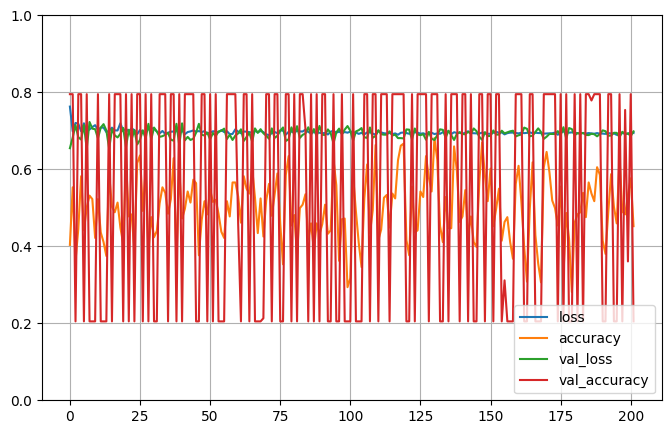


Testing # 2 1
2023-04-29 15:57:19.544345
PREDICT
Test 1:0 97:25 79.51%
Predict 1:0 122:0 100.00%
Test sizes (122, 1025) (122,)
Distrib of scores: 0.51633334 mean 0.00016616884 std
Range of scores: 0.515867 to 0.51676637
Score threshold 0.5
Confusion matrix
 [[ 0 25]
 [ 0 97]]
Normalized matrix
 [[0.         0.20491803]
 [0.         0.79508197]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


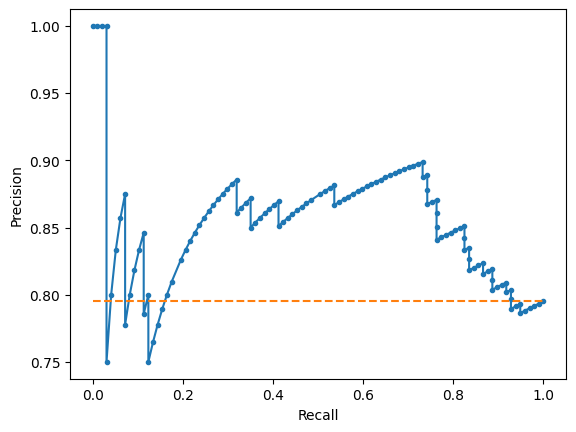

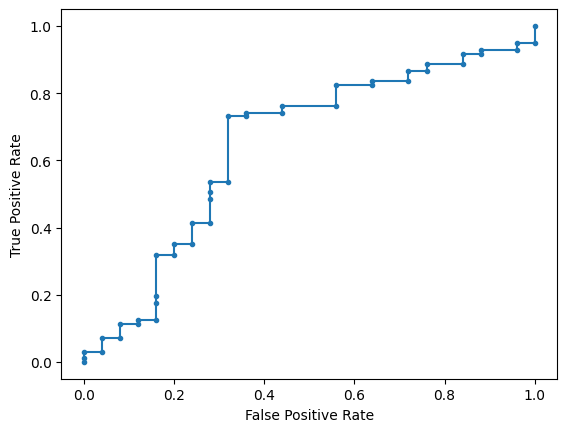

Accuracy: 79.51% Precision: 79.51% Recall: 100.00%
F1: 88.58% MCC: 0.0000
AUPRC: 85.14% AUROC: 64.58%
 accuracy [79.50819672131148]
 precision [79.50819672131148]
 recall [100.0]
 F1 [88.58447488584476]
 MCC [0.0]
 AUPRC [85.14212245268152]
 AUROC [64.57731958762886]

Training # 2 2
2023-04-29 15:57:20.116406
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [0.03989028899722127, -1.9063324551349632]
Variances [1.10467886 2.50989739]
Priors [0.67314432 0.32685568]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 422:120 77.86%
Computed class weights: {0: 2.2583333333333333, 1: 0.6421800947867299}
Valid 1:0 105:30 77.78%
FIT


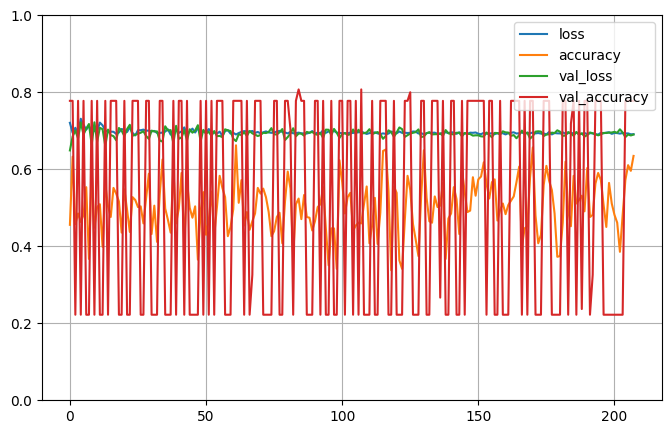


Testing # 2 2
2023-04-29 15:57:47.923011
PREDICT
Test 1:0 105:30 77.78%
Predict 1:0 129:6 95.56%
Test sizes (135, 1025) (135,)
Distrib of scores: 0.50028926 mean 0.00013726878 std
Range of scores: 0.49995372 to 0.5006023
Score threshold 0.5
Confusion matrix
 [[  5  25]
 [  1 104]]
Normalized matrix
 [[0.03703704 0.18518519]
 [0.00740741 0.77037037]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


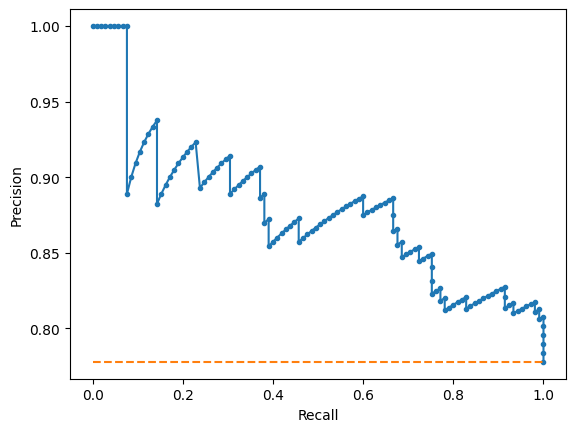

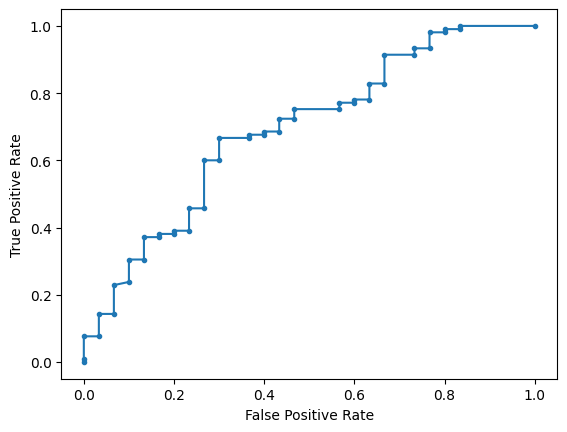

Accuracy: 80.74% Precision: 80.62% Recall: 99.05%
F1: 88.89% MCC: 0.3170
AUPRC: 87.71% AUROC: 69.16%
 accuracy [80.74074074074075]
 precision [80.62015503875969]
 recall [99.04761904761905]
 F1 [88.88888888888889]
 MCC [0.31701472973732925]
 AUPRC [87.70531758382236]
 AUROC [69.15873015873015]

Training # 2 3
2023-04-29 15:57:48.550063
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [0.04702296110670846, -2.2084160032722107]
Variances [1.11686729 2.72860469]
Priors [0.70375607 0.29624393]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 424:114 78.81%
Computed class weights: {0: 2.3596491228070176, 1: 0.6344339622641509}
Valid 1:0 116:23 83.45%
FIT


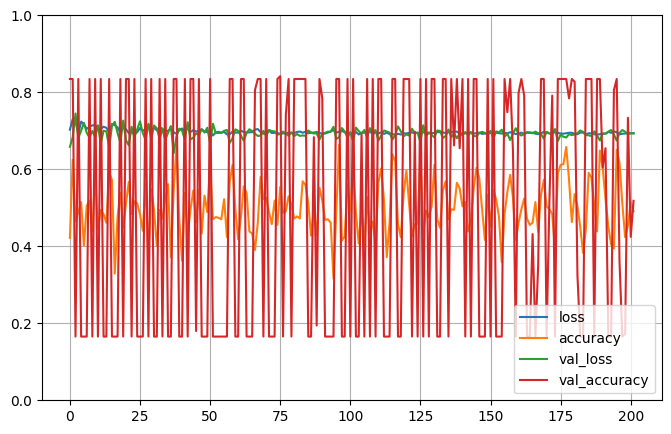


Testing # 2 3
2023-04-29 15:58:32.047261
PREDICT
Test 1:0 116:23 83.45%
Predict 1:0 139:0 100.00%
Test sizes (139, 1025) (139,)
Distrib of scores: 0.5152903 mean 0.00032162573 std
Range of scores: 0.5144459 to 0.51602423
Score threshold 0.5
Confusion matrix
 [[  0  23]
 [  0 116]]
Normalized matrix
 [[0.         0.16546763]
 [0.         0.83453237]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


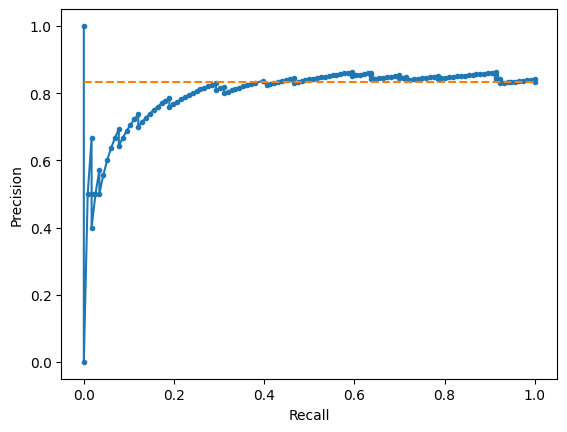

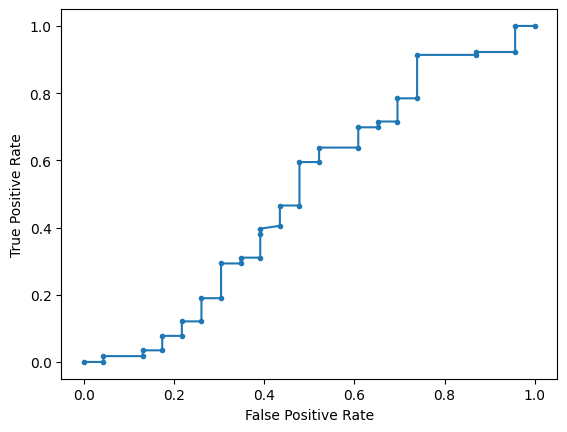

Accuracy: 83.45% Precision: 83.45% Recall: 100.00%
F1: 90.98% MCC: 0.0000
AUPRC: 80.10% AUROC: 50.36%
 accuracy [83.45323741007195]
 precision [83.45323741007195]
 recall [100.0]
 F1 [90.98039215686275]
 MCC [0.0]
 AUPRC [80.09996877996271]
 AUROC [50.35607196401799]

Training # 2 4
2023-04-29 15:58:32.778116
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [0.026349067205585074, -1.8338392905000376]
Variances [1.11127279 2.36033719]
Priors [0.66495091 0.33504909]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 406:117 77.63%
Computed class weights: {0: 2.235042735042735, 1: 0.6440886699507389}
Valid 1:0 116:38 75.32%
FIT


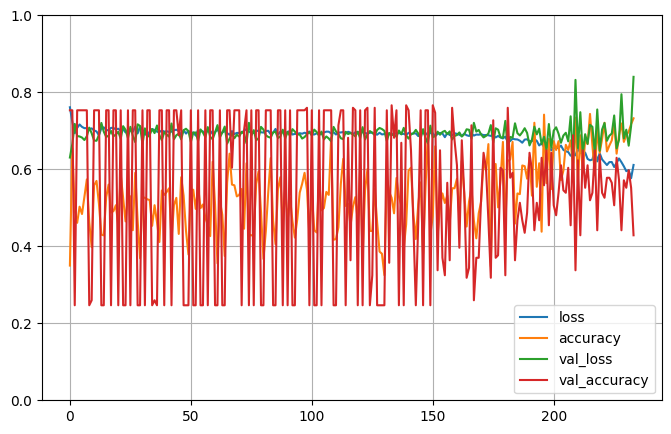


Testing # 2 4
2023-04-29 15:59:08.563974
PREDICT
Test 1:0 116:38 75.32%
Predict 1:0 148:6 96.10%
Test sizes (154, 1025) (154,)
Distrib of scores: 0.5042264 mean 0.0023470253 std
Range of scores: 0.49830624 to 0.50960964
Score threshold 0.5
Confusion matrix
 [[  4  34]
 [  2 114]]
Normalized matrix
 [[0.02597403 0.22077922]
 [0.01298701 0.74025974]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


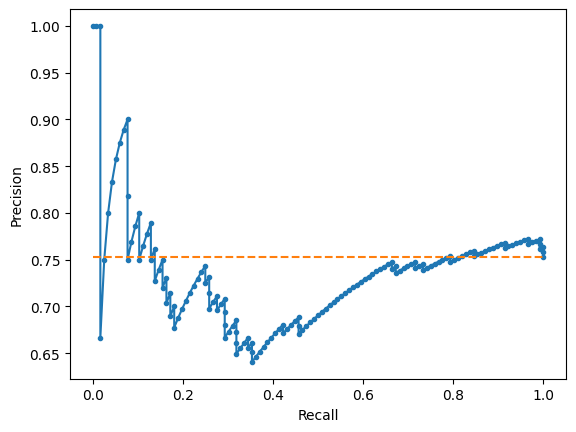

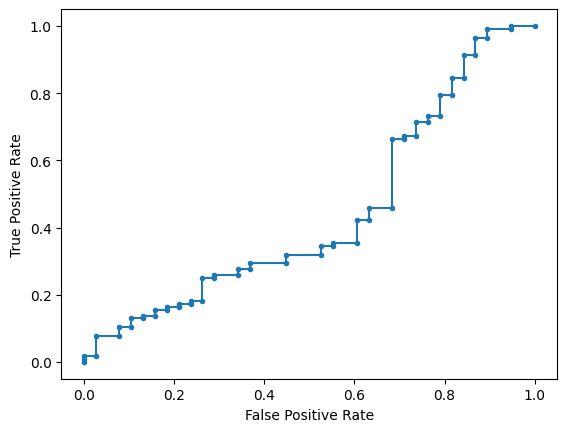

Accuracy: 76.62% Precision: 77.03% Recall: 98.28%
F1: 86.36% MCC: 0.1961
AUPRC: 73.51% AUROC: 44.12%
 accuracy [76.62337662337663]
 precision [77.02702702702703]
 recall [98.27586206896551]
 F1 [86.36363636363636]
 MCC [0.19611212690296723]
 AUPRC [73.50505783925591]
 AUROC [44.12431941923775]

Training # 2 5
2023-04-29 15:59:09.193398
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [-0.009044138287210362, -2.1649771139740244]
Variances [1.0613454  2.57901139]
Priors [0.71289996 0.28710004]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 442:108 80.36%
Computed class weights: {0: 2.5462962962962963, 1: 0.6221719457013575}
Valid 1:0 102:25 80.31%
FIT


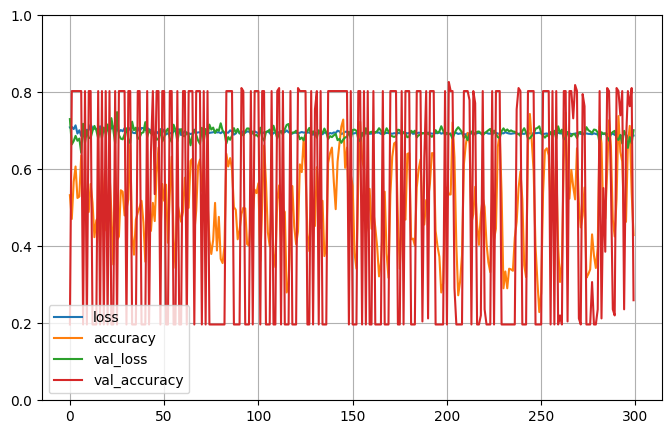


Testing # 2 5
2023-04-29 15:59:52.242676
PREDICT
Test 1:0 102:25 80.31%
Predict 1:0 14:113 11.02%
Test sizes (127, 1025) (127,)
Distrib of scores: 0.4905514 mean 0.0094436295 std
Range of scores: 0.46550822 to 0.52162737
Score threshold 0.5
Confusion matrix
 [[22  3]
 [91 11]]
Normalized matrix
 [[0.17322835 0.02362205]
 [0.71653543 0.08661417]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


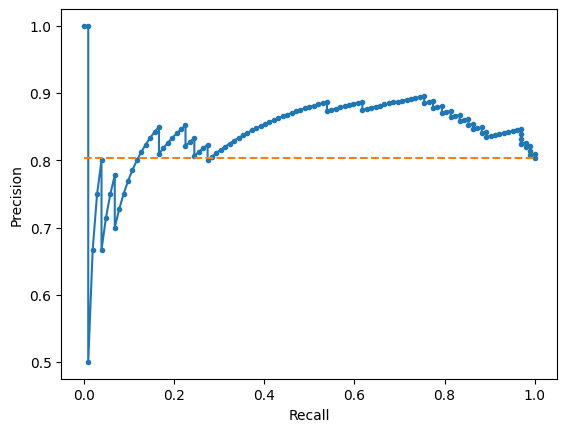

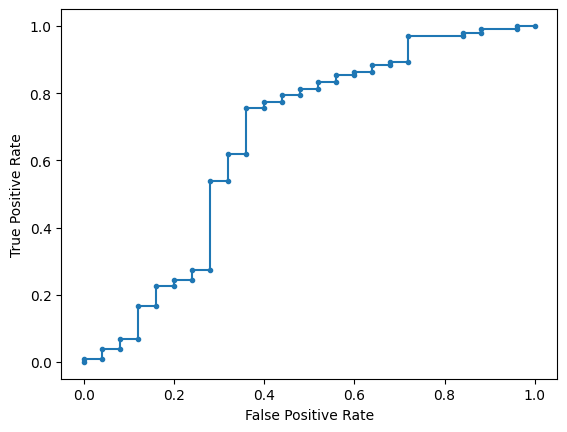

Accuracy: 25.98% Precision: 78.57% Recall: 10.78%
F1: 18.97% MCC: -0.0154
AUPRC: 84.32% AUROC: 66.08%
 accuracy [25.984251968503933]
 precision [78.57142857142857]
 recall [10.784313725490197]
 F1 [18.965517241379313]
 MCC [-0.015434350698293105]
 AUPRC [84.32041358155377]
 AUROC [66.07843137254902]
2023-04-29 15:59:52.847932


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 74.70% std 17.44
 precision mean 79.93% std 3.33
 recall mean 90.71% std 28.09
 F1 mean 81.77% std 22.17
 MCC mean 0.1219 std 0.1394
 AUPRC mean 82.17% std 5.72
 AUROC mean 58.83% std 8.21
 accuracy [[85.8267716535433], [83.57142857142857], [76.05633802816901], [78.62595419847328], [76.64233576642336], [79.50819672131148], [80.74074074074075], [83.45323741007195], [76.62337662337663], [25.984251968503933]]
 precision [[85.8267716535433], [83.21167883211679], [75.53956834532374], [78.90625], [76.64233576642336], [79.50819672131148], [80.62015503875969], [83.45323741007195], [77.02702702702703], [78.57142857142857]]
 recall [[100.0], [100.0], [100.0], [99.01960784313727], [100.0], [100.0], [99.04761904761905], [100.0], [98.27586206896551], [10.784313725490197]]
 F1 [[92.37288135593221], [90.83665338645417], [86.0655737704918], [87.82608695652175], [86.77685950413223], [88.58447488584476], [88.88888888888889], [90.98039215686275], [86.36363636363636], [18.965517241379313]]
